In [1]:
# !pip install pandas Jinja2 matplotlib

In [2]:
import os
import sys
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from data_processing.aggregate_logs_to_csv import aggregate_models_to_csv
from data_processing.aggr_logs_to_plain_csv import aggregate_logs_to_csv

## Get Aggregate CSV

In [3]:
LOGS_DIR = "_logs/no_reflection"
AGGREGATE_CSV = os.path.join(LOGS_DIR, "aggregate_models.csv")
REFINED_CSV = "data_processing/refined.csv"

model_dict = {
    "2025-01-16_alamios-gemma-2-9b-it@f16": "gemma-2-9b-it@f16",
    "2025-01-16_gemma-2-9b-it@iq4_xs": "gemma-2-9b-it@iq4_xs",
    "2025-01-16_gemma-2-9b-it@q4_k_m": "gemma-2-9b-it@q4_k_m",
    "2025-01-16_gemma-2-9b-it@q8_0": "gemma-2-9b-it@q8_0",
    "2025-01-16_meta-llama-3.1-8b-instruct@iq4_xs": "llama-3.1-8b@iq4_xs",
    "2025-01-16_meta-llama-3.1-8b-instruct@q4_k_m": "llama-3.1-8b@q4_k_m",
    "2025-01-16_meta-llama-3.1-8b-instruct@q4_k_m_2": "llama-3.1-8b@q4_k_m",
    "2025-01-16_meta-llama-3.1-8b-instruct@q8_0": "llama-3.1-8b@q8_0",
    "2025-01-16_meta-llama-3.1-8b-instruct@q8_0_2": "llama-3.1-8b@q8_0",
    "2025-01-16_sanctumai-meta-llama-3.1-8b-instruct@f16": "llama-3.1-8b@f16",
    "2025-01-17_bartowski-meta-llama-3.1-8b-instruct@f32": "llama-3.1-8b@f32",
    "2025-01-17_bartowski-meta-llama-3.1-8b-instruct@f32_2": "llama-3.1-8b@f32",
    "2025-01-17_meta-llama-3.1-8b-instruct@iq4_xs": "llama-3.1-8b@iq4_xs",
    "2025-01-17_meta-llama-3.1-8b-instruct@iq4_xs_NOFA": "llama-3.1-8b@iq4_xs|NOFA",
    "2025-01-17_meta-llama-3.1-8b-instruct@q4_k_m": "llama-3.1-8b@q4_k_m",
    "2025-01-17_meta-llama-3.1-8b-instruct@q4_k_m_NOFA": "llama-3.1-8b@q4_k_m|NOFA",
    "2025-01-17_meta-llama-3.1-8b-instruct@q8_0": "llama-3.1-8b@q8_0",
    "2025-01-17_meta-llama-3.1-8b-instruct@q8_0_NOFA": "llama-3.1-8b@q8_0|NOFA",
    "2025-01-17_sanctumai-meta-llama-3.1-8b-instruct@f16": "llama-3.1-8b@f16",
    "2025-01-17_sanctumai-meta-llama-3.1-8b-instruct@f16_NOFA": "llama-3.1-8b@f16|NOFA",
    "2025-01-18_gemma-2-9b-it@iq4_xs": "gemma-2-9b-it@iq4_xs",
    "2025-01-18_gemma-2-9b-it@iq4_xs_NOFA": "gemma-2-9b-it@iq4_xs|NOFA",
    "2025-01-18_gemma-2-9b-it@q4_k_m": "gemma-2-9b-it@q4_k_m",
    "2025-01-18_gemma-2-9b-it@q4_k_m_NOFA": "gemma-2-9b-it@q4_k_m|NOFA",
    "2025-01-19_bartowski-gemma-2-9b-it@f32": "gemma-2-9b-it@f32",
    "2025-01-20_gemma-2-9b-it@f16": "gemma-2-9b-it@f16",
    "2025-01-20_gemma-2-9b-it@f16_NOFA": "gemma-2-9b-it@f16|NOFA",
    "2025-01-20_gemma-2-9b-it@q8_0": "gemma-2-9b-it@q8_0",
    "2025-01-20_gemma-2-9b-it@q8_0_NOFA": "gemma-2-9b-it@q8_0|NOFA",
    "cerebras/2025-01-16_llama3.1-8b": "llama-3.1-8b@unk|cerebras",
    "cerebras/2025-01-16_llama3.1-8b_2": "llama-3.1-8b@unk|cerebras",
    "cerebras/2025-01-17_llama3.1-8b": "llama-3.1-8b@unk|cerebras",
    "cerebras/2025-01-17_llama3.1-8b_2": "llama-3.1-8b@unk|cerebras",
    "cerebras/2025-01-18_llama3.1-8b": "llama-3.1-8b@unk|cerebras",
    "groq/2025-01-16_llama-3.1-8b-instant": "llama-3.1-8b@unk|groq",
    "groq/2025-01-16_llama-3.1-8b-instant_2": "llama-3.1-8b@unk|groq",
    "groq/2025-01-17_llama-3.1-8b-instant": "llama-3.1-8b@unk|groq",
    "groq/2025-01-18_llama-3.1-8b-instant": "llama-3.1-8b@unk|groq",
    "groq/2025-01-19_llama-3.1-8b-instant": "llama-3.1-8b@unk|groq",
    "temp001/2025-01-18_meta-llama-3.1-8b-instruct@iq4_xs": "llama-3.1-8b@iq4_xs|t001",
    "temp001/2025-01-18_meta-llama-3.1-8b-instruct@q4_k_m": "llama-3.1-8b@q4_k_m|t001",
    "temp001/2025-01-18_meta-llama-3.1-8b-instruct@q8_0": "llama-3.1-8b@q8_0|t001",
    "_logs/quantization_research/2025-01-16_meta-llama-3.1-8b-instruct@q4_k_m_2": "llama-3.1-8b@q4_k_m_2",
    "_logs/quantization_research/2025-01-16_meta-llama-3.1-8b-instruct@q8_0_2": "llama-3.1-8b@q8_0_2",
    "_logs/quantization_research/2025-01-27_qwen2.5-14b-instruct-1m@q4_k_m": "qwen2.5-14b@q4_k_m",
    "_logs/quantization_research/2025-01-27_qwen2.5-14b-instruct-1m@q8_0": "qwen2.5-14b@q8_0",
    "_logs/quantization_research/2025-01-27_qwen2.5-7b-instruct-1m@q4_k_m": "qwen2.5-7b@q4_k_m",
    "_logs/quantization_research/2025-01-27_qwen2.5-7b-instruct-1m@q8_0": "qwen2.5-7b@q8_0",
}

aggregate_models_to_csv("../_logs/quantization_research","aggr.csv",model_dict)

In [4]:
csv_file_path = "aggr.csv"
# CSV cols
# model_name,total_games,black_llm_wins,white_rand_wins,draws,black_llm_wins_percent,black_llm_draws_percent,llm_total_moves,llm_wrong_actions,llm_wrong_moves,llm_avg_material,llm_std_dev_material,rand_avg_material,rand_std_dev_material,material_diff_llm_minus_rand,material_diff_llm_minus_rand_per_100moves,wrong_actions_per_100moves,wrong_moves_per_100moves,average_moves,std_dev_moves,completion_tokens_black,completion_tokens_black_per_move,min_moves,max_moves,prompt_tokens_black,total_tokens_black

df_aggr = pd.read_csv(csv_file_path)

selected_columns = df_aggr[["model_name", "total_games", "wrong_actions_per_100moves", "wrong_moves_per_100moves", "min_moves", "max_moves", "average_moves", "std_dev_moves"]]

# Print the DataFrame as a properly tabbed table with headers
print(selected_columns.to_string(index=False))


               model_name  total_games  wrong_actions_per_100moves  wrong_moves_per_100moves  min_moves  max_moves  average_moves  std_dev_moves
        gemma-2-9b-it@f16          140                    2.835345                  1.457527          2        200      62.728571      59.895574
   gemma-2-9b-it@f16|NOFA           70                    2.478134                  1.943635          6        200      58.800000      59.495122
        gemma-2-9b-it@f32           70                    2.914798                  2.017937          2        200      57.342857      54.730403
     gemma-2-9b-it@iq4_xs          140                    2.202291                  0.799219          2        200      80.435714      73.731304
gemma-2-9b-it@iq4_xs|NOFA           70                    2.394466                  0.762682          2        200      80.542857      67.724011
     gemma-2-9b-it@q4_k_m          140                    3.134208                  2.343959          2        198      53.328571 

I would ignore Qwen further as it is a new model with some updated mechanism and I am not sure if LM Stuido/llama.cpp fully supprot it

## Get Flattened (Plain) CSV with Logs

In [5]:


def process_logs_to_dataframe(logs_path, output_csv, model_dict):
    """
    Process logs into a DataFrame, substitute model names, and return the DataFrame.

    Args:
        logs_path (str): Path to the logs directory.
        output_csv (str): Path to save the intermediate CSV file.
        model_dict (dict): Dictionary for substituting model names.

    Returns:
        pd.DataFrame: Processed DataFrame with substituted model names.
    """
    # Aggregate logs into a CSV
    aggregate_logs_to_csv(logs_path, output_csv)

    # Read the aggregated CSV into a DataFrame
    df_plain = pd.read_csv(output_csv)

    # Insert the 'model' column based on 'player_black_model'
    df_plain.insert(df_plain.columns.get_loc("path") + 1, "model", df_plain["player_black_model"])

    # Replace model names in the DataFrame using model_dict values
    def substitute_model_names(df, model_dict):
        def get_correct_model_name(row):
            key = next((k for k in model_dict if os.path.dirname(row.path).endswith(k)), None)
            return model_dict[key] if key else row["model"]  # Default to the original model if no match is found

        df["model"] = df.apply(get_correct_model_name, axis=1)

    # Apply the substitution logic
    substitute_model_names(df_plain, model_dict)

    return df_plain

# Example usage
df_plain = process_logs_to_dataframe("../_logs/quantization_research", "plain.csv", model_dict)
display(df_plain.head(2))


,path,model,time_started,winner,reason,number_of_moves,player_white_name,player_white_wrong_moves,player_white_wrong_actions,player_white_reflections_used,...,player_black_wrong_actions,player_black_reflections_used,player_black_reflections_used_before_board,player_black_model,usage_stats_white_total_cost,usage_stats_black_total_cost,usage_stats_black_model_cost,usage_stats_black_model_prompt_tokens,usage_stats_black_model_completion_tokens,usage_stats_black_model_total_tokens
0,../_logs/quantization_research/2025-01-20_gemm...,gemma-2-9b-it@f16|NOFA,2025.01.21_00:48,Random_Player,Too many wrong actions,12,Random_Player,0,0,0,...,1,0,0,alamios/gemma-2-9b-it,0,0,0,7910,744,8654
1,../_logs/quantization_research/2025-01-20_gemm...,gemma-2-9b-it@f16|NOFA,2025.01.21_01:06,Random_Player,Too many wrong actions,38,Random_Player,0,0,0,...,3,0,0,alamios/gemma-2-9b-it,0,0,0,23619,2002,25621


## Compare Aggr to Aggr-from-Plain

In [6]:
# Compare aggregates from aggr.csv to thoses ones obtained from plain.csv, check number of games/logs to to match (the number of log files == sum of total games)

selected_columns = df_aggr.set_index("model_name")[["total_games", "wrong_actions_per_100moves", "wrong_moves_per_100moves", "min_moves", "max_moves", "average_moves", "std_dev_moves"]]

# Group the data by 'player_black_model' and calculate the number of moves for each model
grouped_data = df_plain.groupby('model')['number_of_moves']

aggregates = df_plain.groupby('model').agg(
    total_games=('number_of_moves', 'count'),
    sum_wrong_actions=('player_black_wrong_actions', 'sum'),
    sum_wrong_moves=('player_black_wrong_moves', 'sum'),
    sum_moves=('number_of_moves', 'sum'),
    min_moves=('number_of_moves', 'min'),
    max_moves=('number_of_moves', 'max'),
    average_moves=('number_of_moves', 'mean'),
    std_dev_moves=('number_of_moves', lambda x: x.std(ddof=1))  # Explicitly set ddof=1, usin sample standard deviation to generalize to a theoretical "Infinite" future
)

# Now compute normalized values
aggregates['wrong_actions_per_100moves'] = (aggregates['sum_wrong_actions'] / aggregates['sum_moves']) * 100
aggregates['wrong_moves_per_100moves'] = (aggregates['sum_wrong_moves'] / aggregates['sum_moves']) * 100

aggregates = aggregates.drop(columns=['sum_moves', 'sum_wrong_actions', 'sum_wrong_moves'])
# Reorder the columns in aggregates to match the order in selected_columns
aggregates = aggregates[["total_games", "wrong_actions_per_100moves", "wrong_moves_per_100moves", "min_moves", "max_moves", "average_moves", "std_dev_moves"]]



# Calculate and print the sum of total_games in df_aggr
df_aggr_total_games_sum = df_aggr["total_games"].sum()
print(f"Sum of total_games in df_aggr: {df_aggr_total_games_sum}")

# Calculate and print the sum of total_games in aggregates
aggregates_total_games_sum = aggregates["total_games"].sum()
print(f"Sum of total_games in aggregates: {aggregates_total_games_sum}")

# Searching in quantized logs folder suggests there're 2320 JSON log files

# Print the DataFrame as a properly tabbed table with headers
print(selected_columns.to_string())

# Print the calculated aggregates
print(aggregates.to_string())


Sum of total_games in df_aggr: 2532
Sum of total_games in aggregates: 2532
                           total_games  wrong_actions_per_100moves  wrong_moves_per_100moves  min_moves  max_moves  average_moves  std_dev_moves
model_name                                                                                                                                      
gemma-2-9b-it@f16                  140                    2.835345                  1.457527          2        200      62.728571      59.895574
gemma-2-9b-it@f16|NOFA              70                    2.478134                  1.943635          6        200      58.800000      59.495122
gemma-2-9b-it@f32                   70                    2.914798                  2.017937          2        200      57.342857      54.730403
gemma-2-9b-it@iq4_xs               140                    2.202291                  0.799219          2        200      80.435714      73.731304
gemma-2-9b-it@iq4_xs|NOFA           70                 

## Moves, Histograms

In [7]:
# Filter the DataFrame for rows where 'number_of_moves' is exactly 200
games_with_200_moves = df_plain[df_plain['number_of_moves'] == 200]

# Group by 'model' and count the number of games for each model
model_game_counts = games_with_200_moves.groupby('model').size()

# Print the model and the number of games with exactly 200 moves
print("Model and number of games with exactly 200 moves:")
print(model_game_counts.to_string())

Model and number of games with exactly 200 moves:
model
gemma-2-9b-it@f16            12
gemma-2-9b-it@f16|NOFA        8
gemma-2-9b-it@f32             2
gemma-2-9b-it@iq4_xs         27
gemma-2-9b-it@iq4_xs|NOFA    11
gemma-2-9b-it@q4_k_m|NOFA     1
gemma-2-9b-it@q8_0           11
gemma-2-9b-it@q8_0|NOFA       6
gpt-4o-2024-11-20            62


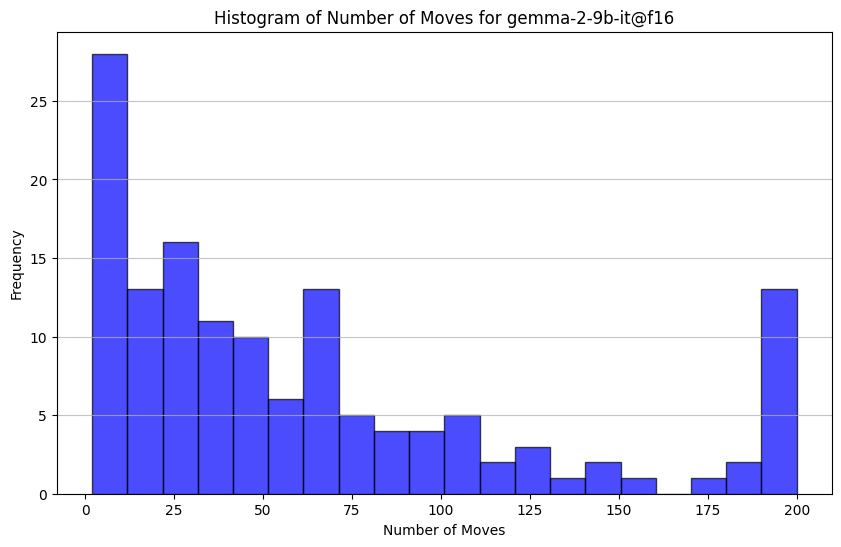

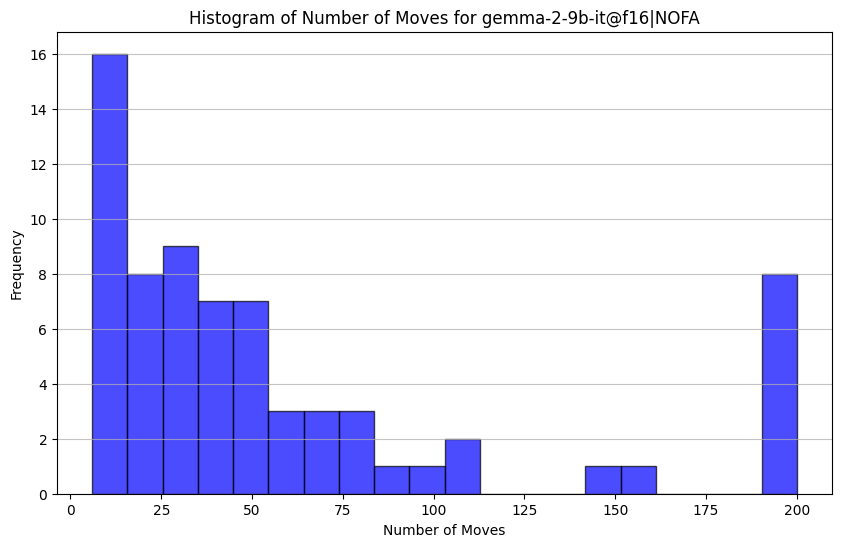

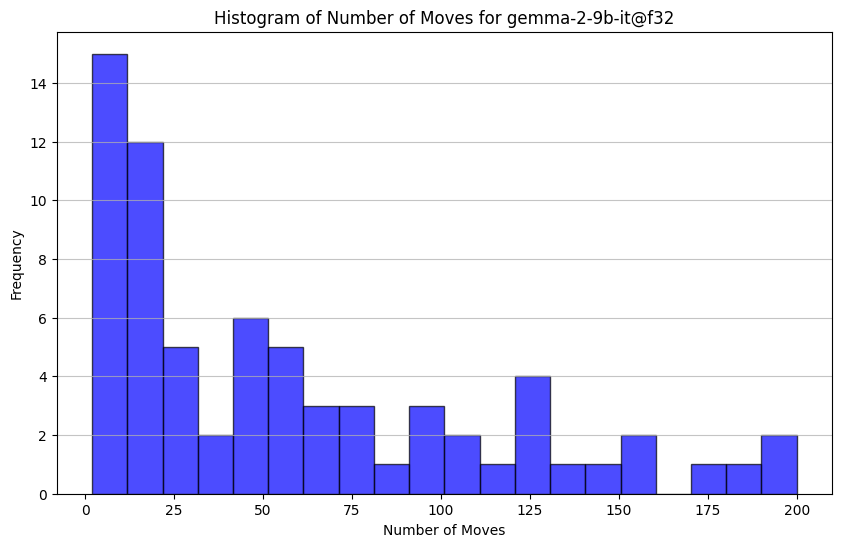

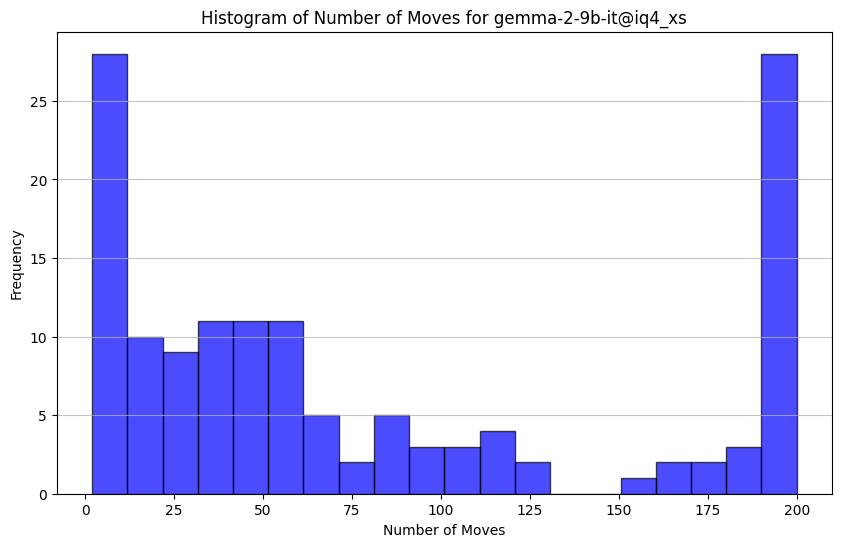

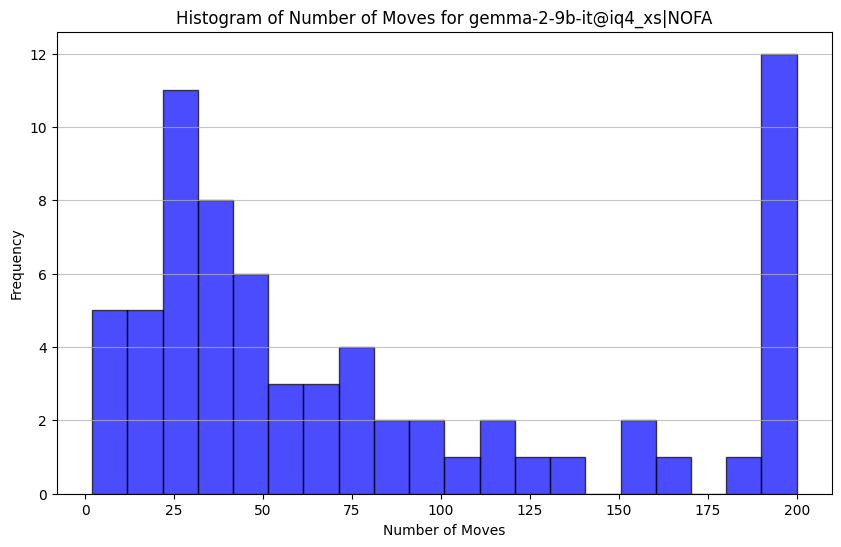

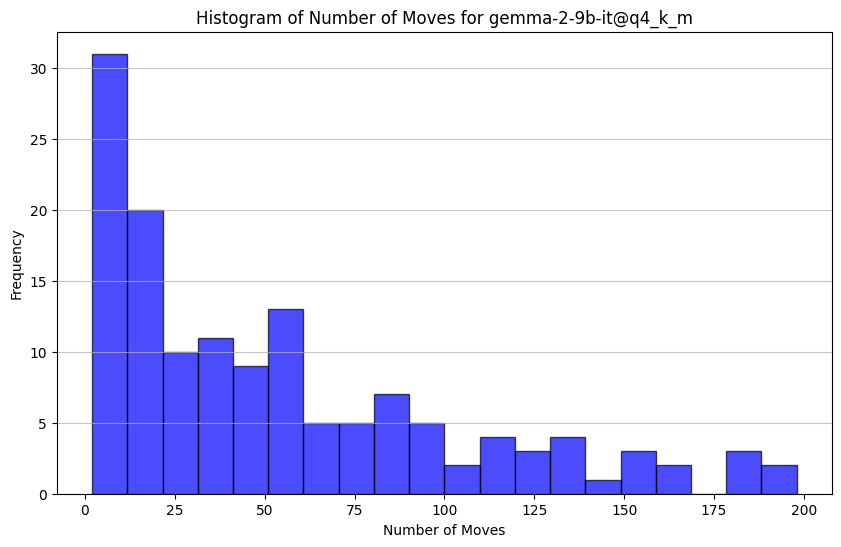

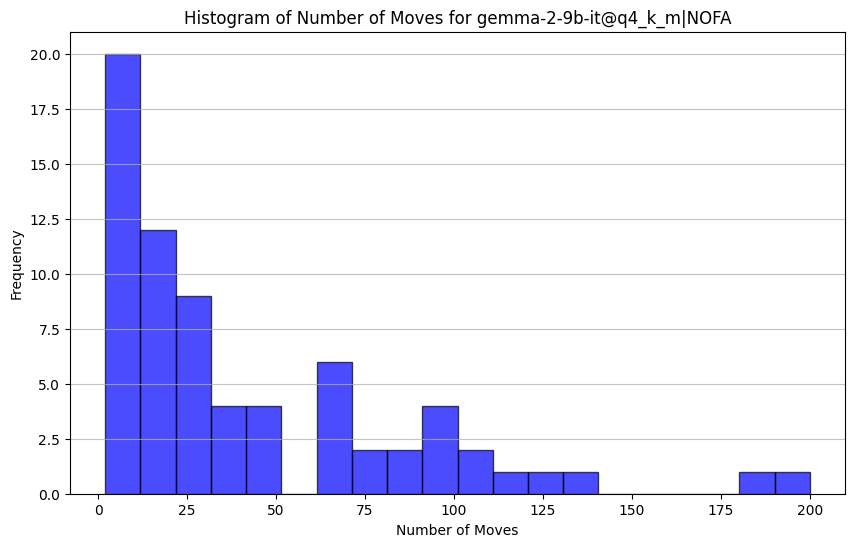

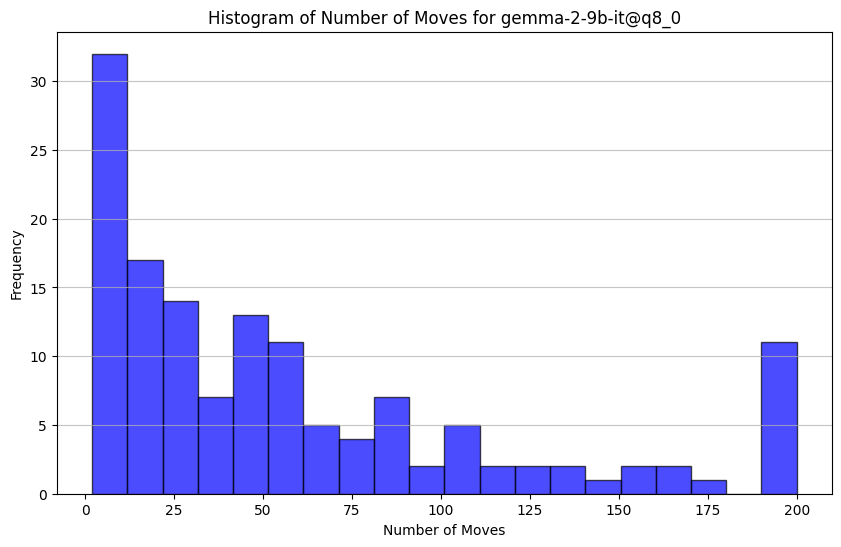

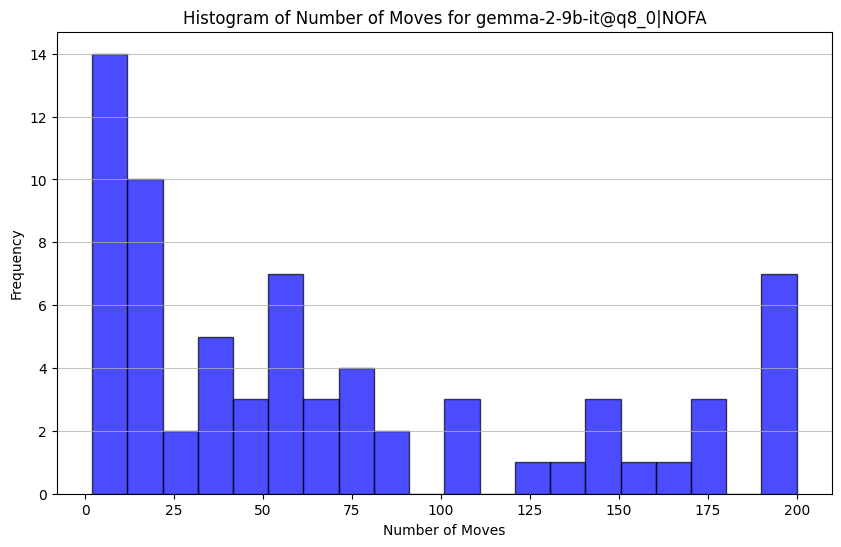

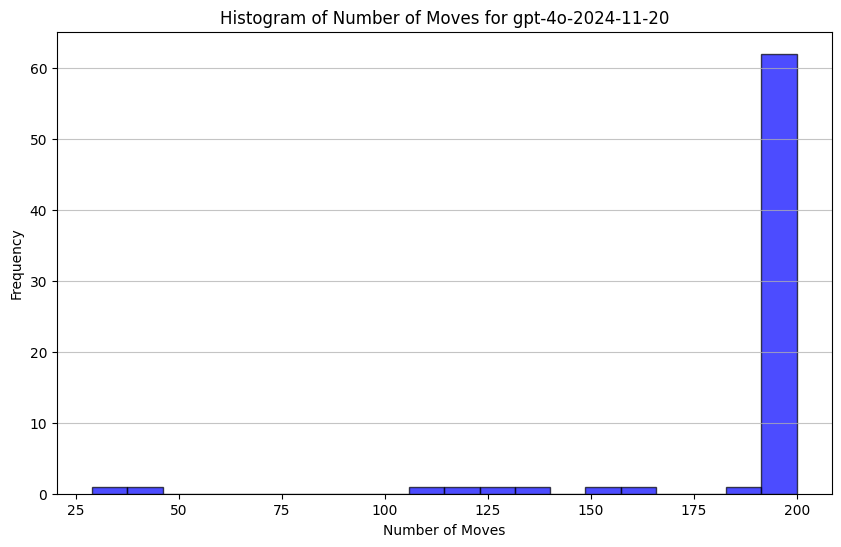

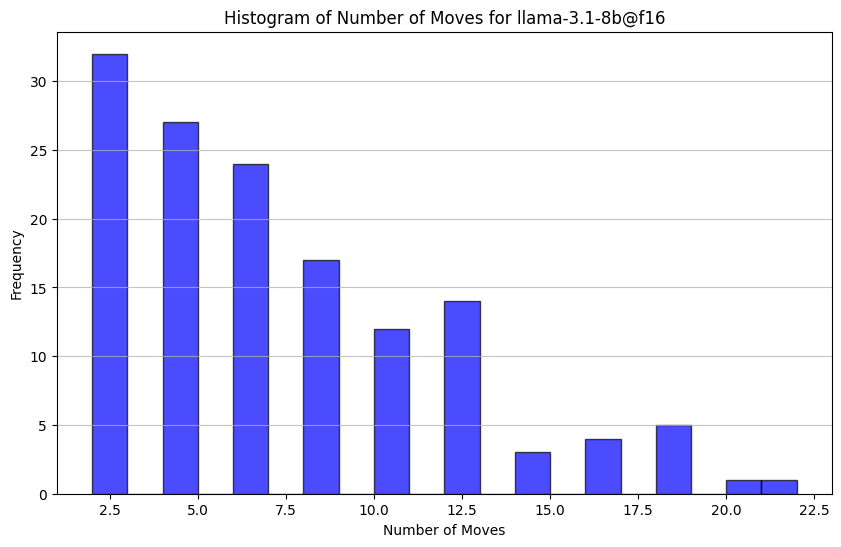

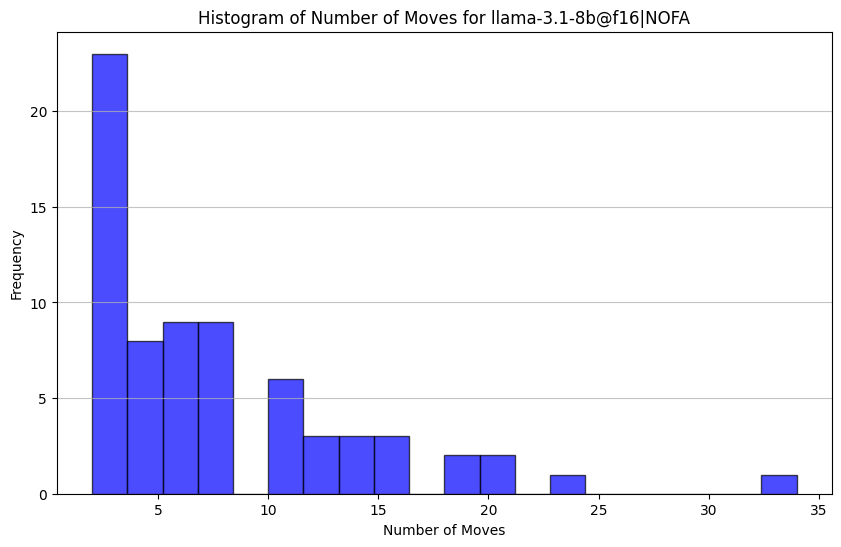

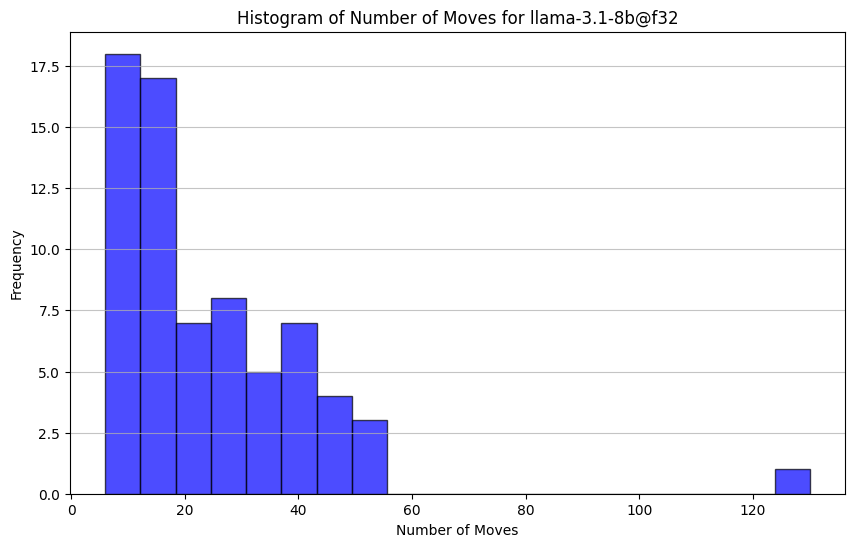

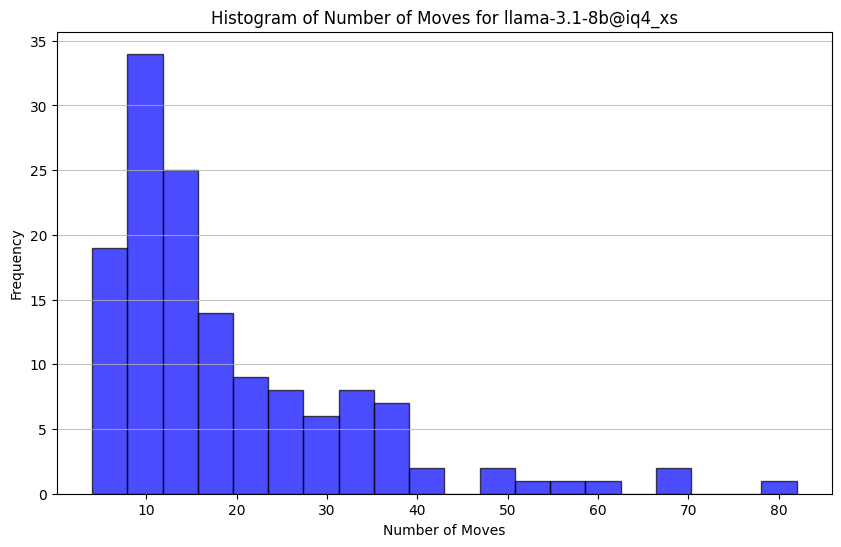

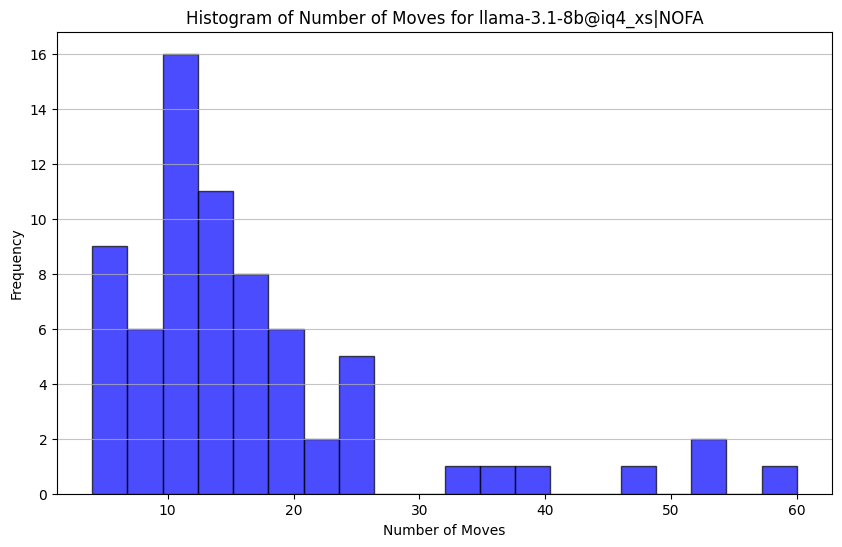

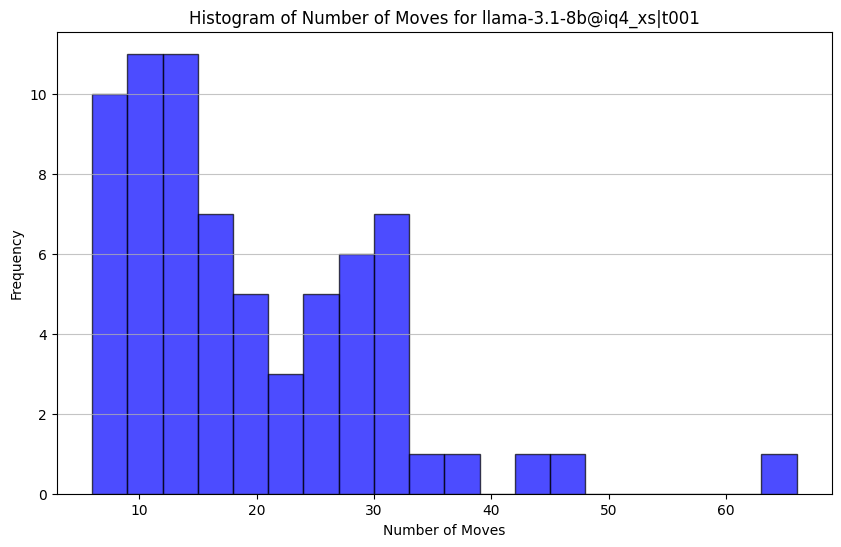

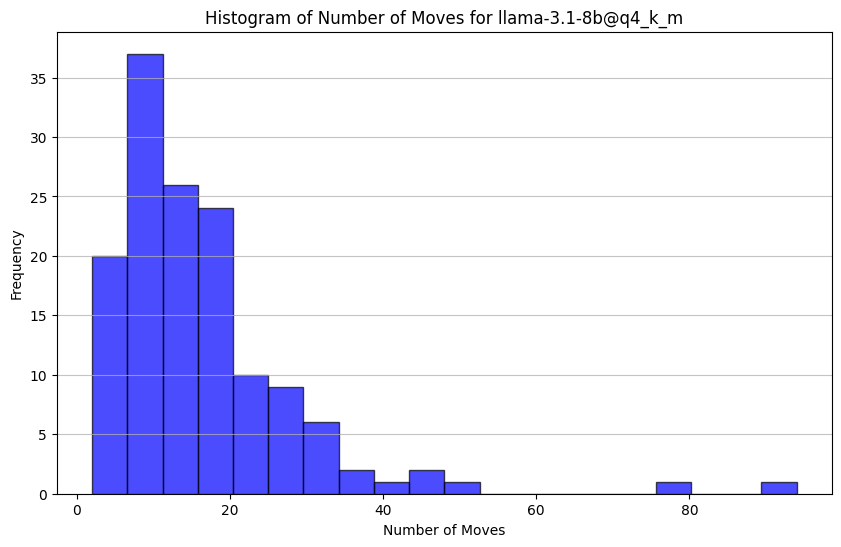

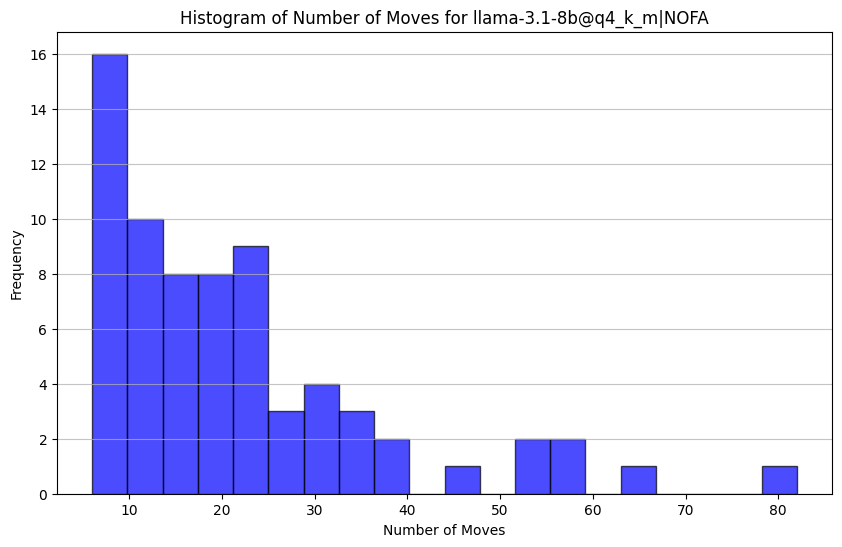

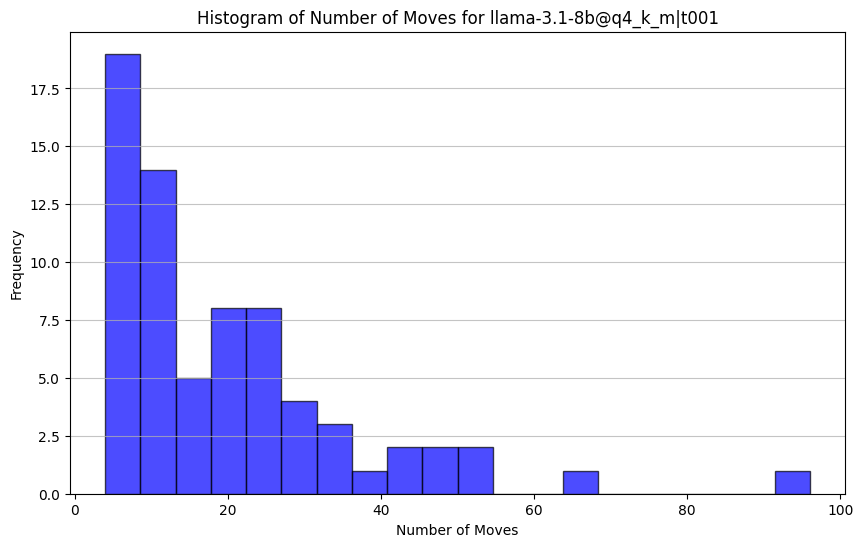

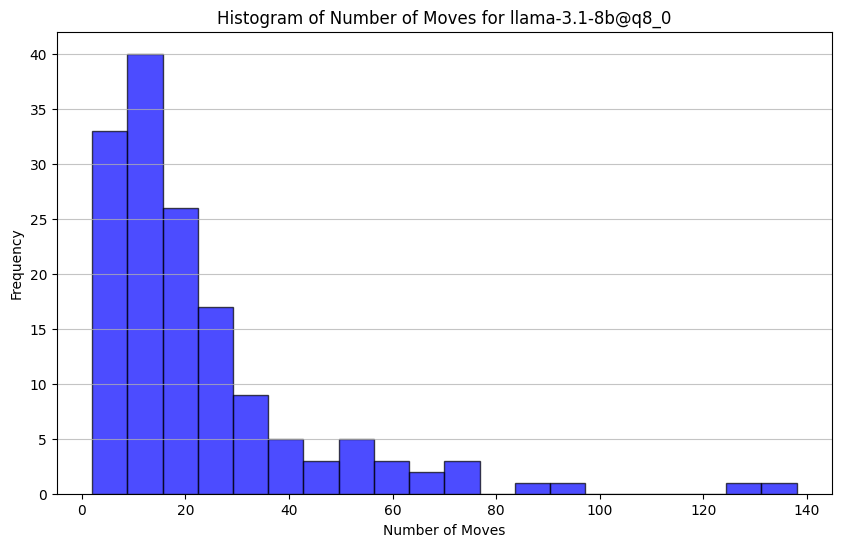

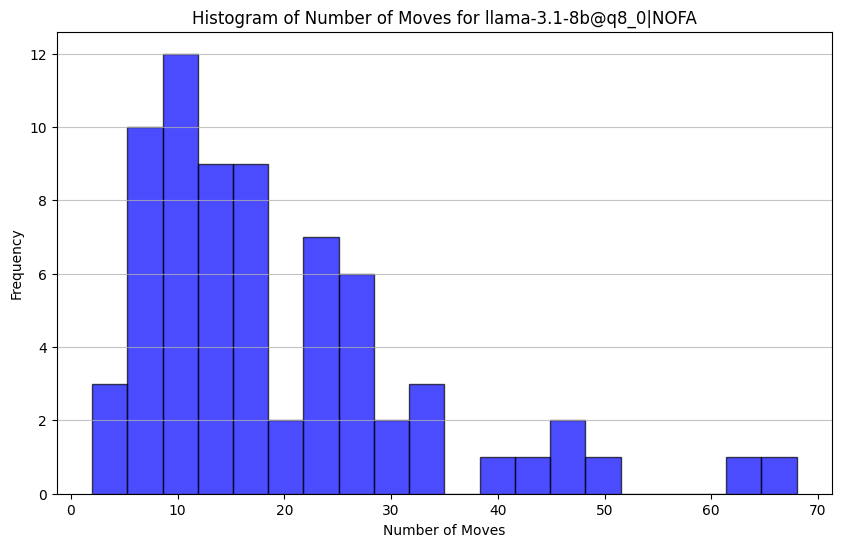

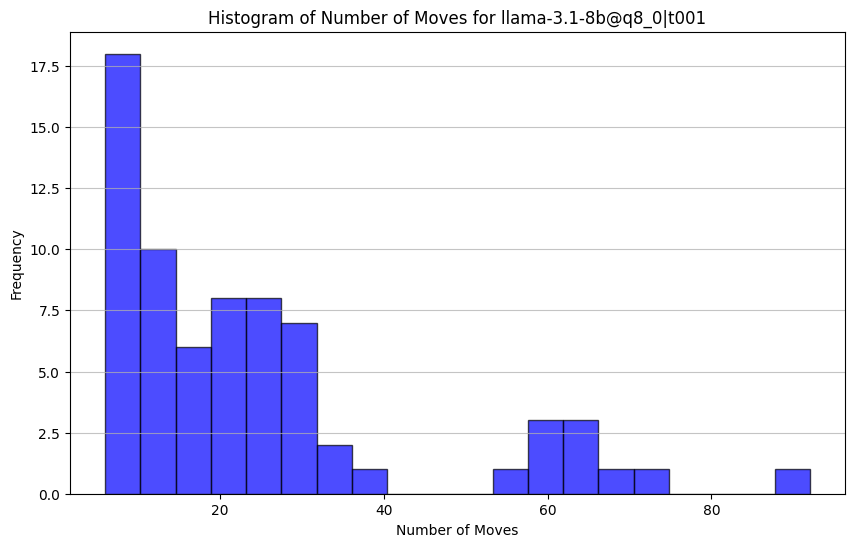

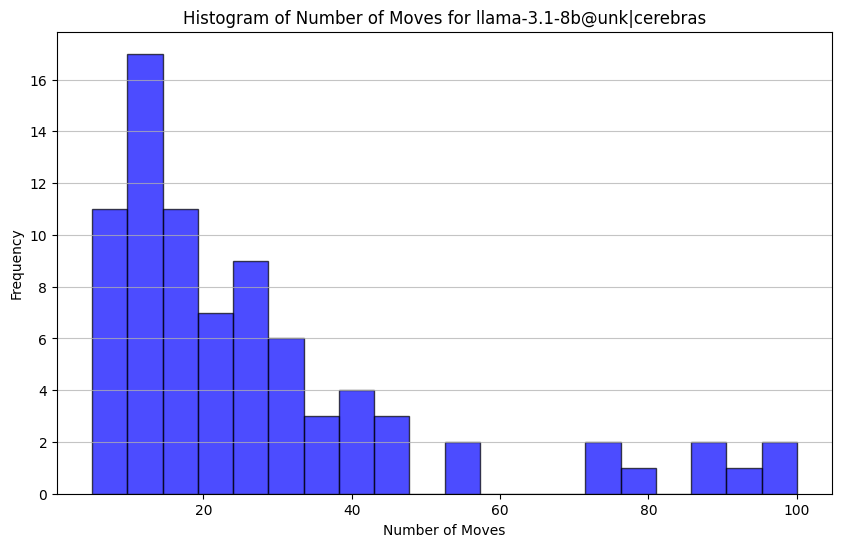

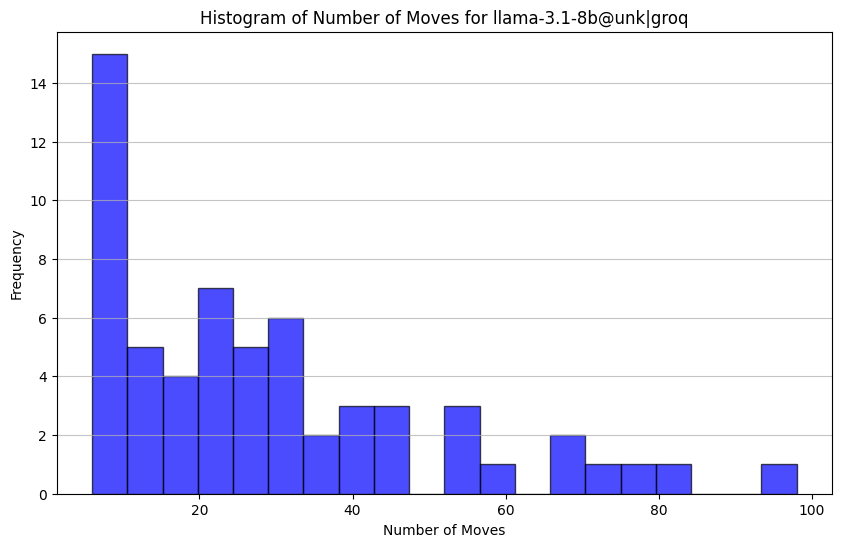

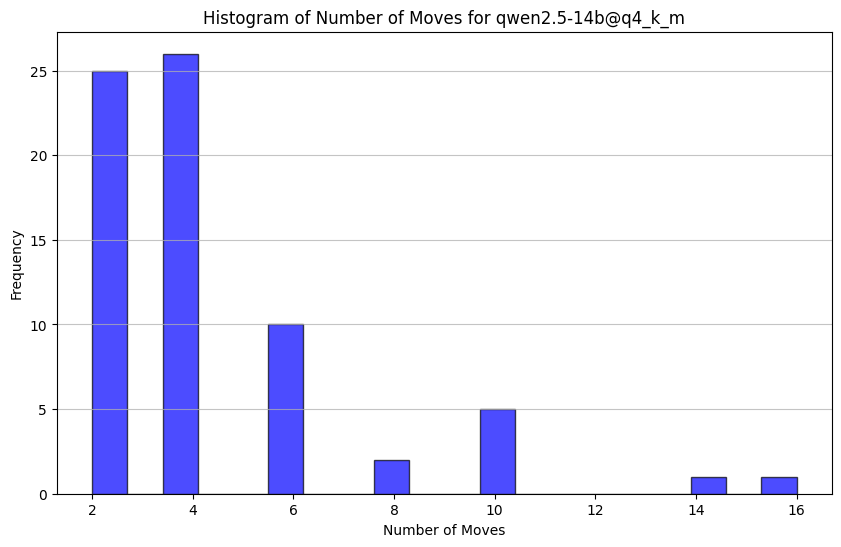

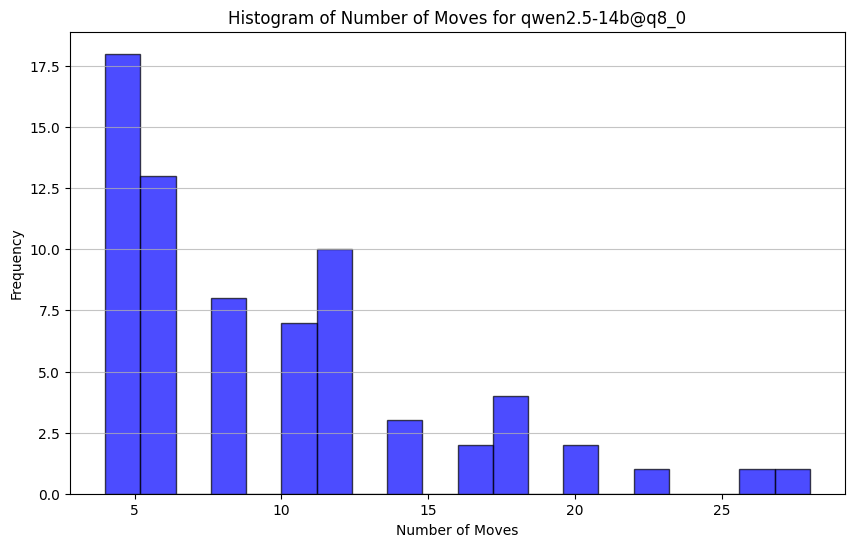

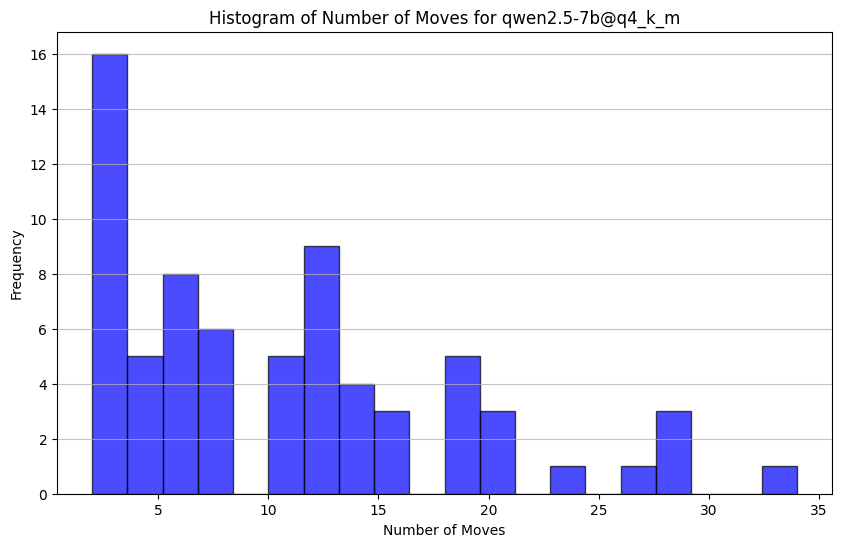

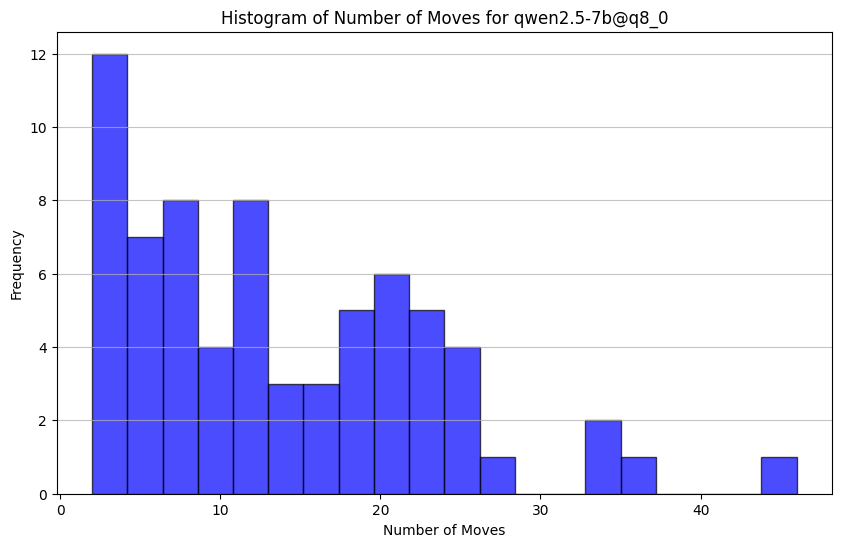

In [8]:
# Group the data by 'player_black_model' and calculate the number of moves for each model
grouped_data = df_plain.groupby('model')['number_of_moves']


# Generate histograms for each player_black_model
for model, moves in grouped_data:
    plt.figure(figsize=(10, 6))
    plt.hist(moves, bins=20, color='blue', alpha=0.7, edgecolor='black')
    plt.title(f'Histogram of Number of Moves for {model}')
    plt.xlabel('Number of Moves')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [9]:
# Iterate through each model and its corresponding moves
for model, moves in grouped_data:
    # Create a textual histogram
    print(f"Histogram of Number of Moves for {model}:")
    bins = range(1, 201, 10)  # Define bins as 1-10, 11-20, ..., 191-200
    histogram = {f"{bin_start}-{bin_start + 9}": 0 for bin_start in bins}

    # Populate the histogram
    for move in moves:
        for bin_start in bins:
            if bin_start <= move < bin_start + 10:
                histogram[f"{bin_start}-{bin_start + 9}"] += 1
                break

    # Print the histogram as percentage frequency
    total_moves = sum(histogram.values())
    for bin_range, count in histogram.items():
        percentage = (count / total_moves) * 100
        print(f"{bin_range.ljust(10)}: {percentage:>6.2f}%")
    print("\n")


Histogram of Number of Moves for gemma-2-9b-it@f16:
1-10      :  20.00%
11-20     :   9.29%
21-30     :  11.43%
31-40     :   7.86%
41-50     :   7.14%
51-60     :   4.29%
61-70     :   9.29%
71-80     :   3.57%
81-90     :   2.86%
91-100    :   2.86%
101-110   :   3.57%
111-120   :   1.43%
121-130   :   2.14%
131-140   :   0.71%
141-150   :   1.43%
151-160   :   0.71%
161-170   :   0.00%
171-180   :   0.71%
181-190   :   1.43%
191-200   :   9.29%


Histogram of Number of Moves for gemma-2-9b-it@f16|NOFA:
1-10      :  12.86%
11-20     :  17.14%
21-30     :  11.43%
31-40     :  12.86%
41-50     :   7.14%
51-60     :   8.57%
61-70     :   5.71%
71-80     :   4.29%
81-90     :   0.00%
91-100    :   2.86%
101-110   :   2.86%
111-120   :   0.00%
121-130   :   0.00%
131-140   :   0.00%
141-150   :   1.43%
151-160   :   1.43%
161-170   :   0.00%
171-180   :   0.00%
181-190   :   0.00%
191-200   :  11.43%


Histogram of Number of Moves for gemma-2-9b-it@f32:
1-10      :  21.43%
11-20     :  17

## Refining logs, splitting model names

### Process Logs, Get Refined

In [10]:
def get_refined_logs_from_csv(logs_path="../_logs/quantization_research", file_name="plain.csv", model_mapping=model_dict):
    """
    Process logs from a CSV file and return a refined DataFrame.

    Parameters:
        logs_path (str): The path to the logs directory.
        file_name (str): The name of the CSV file to process.
        model_mapping (dict): A dictionary mapping model names to additional metadata.

    Returns:
        pd.DataFrame: A refined DataFrame with additional columns and transformations.
    """
    # Load the raw DataFrame from the logs
    df_plain = process_logs_to_dataframe(logs_path, file_name, model_mapping)

    # Function to extract refined model name, quantization, and feature
    def process_model_name(model):
        # Split the model name at '@' to separate the base model and quantization/feature
        parts = model.split('@')
        refined_model_name = parts[0]  # The part before '@' is the refined model name
        quantization = ""
        feature = ""
        
        if len(parts) > 1:
            # Split the part after '@' at '|' to separate quantization and feature
            quantization_feature = parts[1].split('|')
            quantization = quantization_feature[0]  # The part before '|' is the quantization
            if len(quantization_feature) > 1:
                feature = quantization_feature[1]  # The part after '|' is the feature
        
        return refined_model_name, quantization, feature

    # Create a new DataFrame df_plain_refined from df_plain
    df_plain_refined = df_plain.copy()

    # Apply the function to the 'model' column and create new columns
    df_plain_refined[['model', 'quantization', 'feature']] = df_plain['model'].apply(
        lambda x: pd.Series(process_model_name(x))
    )

    # Reorder the columns to move 'quantization' and 'feature' starting at index 2
    columns = list(df_plain_refined.columns)
    columns.remove('quantization')
    columns.remove('feature')
    columns.insert(2, 'quantization')
    columns.insert(3, 'feature')
    df_plain_refined = df_plain_refined[columns]

    # Remove "../_logs/quantization_research/" from the 'path' column
    df_plain_refined['path'] = df_plain_refined['path'].str.replace("../_logs/quantization_research/", "", regex=False)

    # Add wrong_actions_per_100moves and wrong_moves_per_100moves columns
    df_plain_refined['wrong_actions_per_100moves'] = (df_plain_refined['player_black_wrong_actions'] / df_plain_refined['number_of_moves']) * 100
    df_plain_refined['wrong_moves_per_100moves'] = (df_plain_refined['player_black_wrong_moves'] / df_plain_refined['number_of_moves']) * 100

    return df_plain_refined


df = get_refined_logs_from_csv()

# Display the first few rows of the refined DataFrame
display(df.head(2))

,path,model,quantization,feature,time_started,winner,reason,number_of_moves,player_white_name,player_white_wrong_moves,...,player_black_reflections_used_before_board,player_black_model,usage_stats_white_total_cost,usage_stats_black_total_cost,usage_stats_black_model_cost,usage_stats_black_model_prompt_tokens,usage_stats_black_model_completion_tokens,usage_stats_black_model_total_tokens,wrong_actions_per_100moves,wrong_moves_per_100moves
0,2025-01-20_gemma-2-9b-it@f16_NOFA/2025.01.21_0...,gemma-2-9b-it,f16,NOFA,2025.01.21_00:48,Random_Player,Too many wrong actions,12,Random_Player,0,...,0,alamios/gemma-2-9b-it,0,0,0,7910,744,8654,8.333333,16.666667
1,2025-01-20_gemma-2-9b-it@f16_NOFA/2025.01.21_0...,gemma-2-9b-it,f16,NOFA,2025.01.21_01:06,Random_Player,Too many wrong actions,38,Random_Player,0,...,0,alamios/gemma-2-9b-it,0,0,0,23619,2002,25621,7.894737,0.000000


### Reusable Functions

In [16]:
# Function to calculate aggregates and derived metrics
def calculate_aggregates(df, group_by_columns):
    """
    Group the DataFrame by specified columns, calculate aggregates, and compute derived metrics.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        group_by_columns (list): List of columns to group by.
    
    Returns:
        pd.DataFrame: Aggregated DataFrame with derived metrics.
    """
    # Calculate raw aggregates
    aggregates = df.groupby(group_by_columns).agg(
        total_games=('number_of_moves', 'count'),
        sum_wrong_actions=('player_black_wrong_actions', 'sum'),
        sum_wrong_moves=('player_black_wrong_moves', 'sum'),
        sum_moves=('number_of_moves', 'sum'),
        min_moves=('number_of_moves', 'min'),
        max_moves=('number_of_moves', 'max'),
        average_moves=('number_of_moves', 'mean'),
        std_dev_moves=('number_of_moves', lambda x: x.std(ddof=1)),  # Sample standard deviation
        avg_material_white=('material_count_white', 'mean'),
        std_dev_material_white=('material_count_white', lambda x: x.std(ddof=1)),
        avg_material_black=('material_count_black', 'mean'),
        std_dev_material_black=('material_count_black', lambda x: x.std(ddof=1)),
        total_tokens=('usage_stats_black_model_total_tokens', 'sum'),
        avg_tokens_per_game=('usage_stats_black_model_total_tokens', 'mean'),
        std_dev_tokens=('usage_stats_black_model_total_tokens', lambda x: x.std(ddof=1)),
        avg_wrong_actions_per_100moves=('wrong_actions_per_100moves', 'mean'),
        std_dev_wrong_actions_per_100moves=('wrong_actions_per_100moves', lambda x: x.std(ddof=1)),
        avg_wrong_moves_per_100moves=('wrong_moves_per_100moves', 'mean'),
        std_dev_wrong_moves_per_100moves=('wrong_moves_per_100moves', lambda x: x.std(ddof=1))
    ).reset_index()

    # Calculate derived metrics (e.g., standard deviation as a percentage of the mean)
    aggregates['std_dev_moves_pct'] = aggregates['std_dev_moves'] / aggregates['average_moves']
    aggregates['std_dev_material_white_pct'] = aggregates['std_dev_material_white'] / aggregates['avg_material_white']
    aggregates['std_dev_material_black_pct'] = aggregates['std_dev_material_black'] / aggregates['avg_material_black']
    aggregates['std_dev_tokens_pct'] = aggregates['std_dev_tokens'] / aggregates['avg_tokens_per_game']
    aggregates['std_dev_wrong_actions_per_100moves_pct'] = aggregates['std_dev_wrong_actions_per_100moves'] / aggregates['avg_wrong_actions_per_100moves']
    aggregates['std_dev_wrong_moves_per_100moves_pct'] = aggregates['std_dev_wrong_moves_per_100moves'] / aggregates['avg_wrong_moves_per_100moves']

    # Drop unnecessary columns
    aggregates = aggregates.drop(columns=['sum_moves', 'sum_wrong_actions', 'sum_wrong_moves'])

    return aggregates

# Function to format percentage columns
def format_percentage_columns(df, percentage_columns):
    """
    Format specified columns as percentages.
    
    Parameters:
        df (pd.DataFrame): The input DataFrame.
        percentage_columns (list): List of columns to format as percentages.
    
    Returns:
        pd.DataFrame: DataFrame with formatted percentage columns.
    """
    for col in percentage_columns:
        df[col] = df[col].apply(lambda x: f"{x:.2%}")
    return df

def select_and_reorder_aggregates(aggregates):
    """
    Select and reorder columns in the aggregates DataFrame.

    Parameters:
        aggregates (pd.DataFrame): The input DataFrame containing aggregate metrics.

    Returns:
        pd.DataFrame: A DataFrame with selected and reordered columns.
    """
    return aggregates[[
        'model', 'quantization', 'feature', 'total_games',
        'min_moves', 'max_moves', 'average_moves', 'std_dev_moves_pct',
        'avg_material_white', 'std_dev_material_white_pct', 
        'avg_material_black', 'std_dev_material_black_pct', 
        'total_tokens', 'avg_tokens_per_game', 'std_dev_tokens_pct',
        'avg_wrong_actions_per_100moves', 'std_dev_wrong_actions_per_100moves_pct',
        'avg_wrong_moves_per_100moves', 'std_dev_wrong_moves_per_100moves_pct',
        # 'std_dev_wrong_moves_per_100moves',
        # 'std_dev_wrong_actions_per_100moves',
    ]]


### Aggregates

In [12]:
aggregates = calculate_aggregates(df, ['model', 'quantization', 'feature'])
aggregates = format_percentage_columns(
    aggregates,
    [
        'std_dev_moves_pct',
        'std_dev_material_white_pct',
        'std_dev_material_black_pct',
        'std_dev_tokens_pct',
        'std_dev_wrong_actions_per_100moves_pct',
        'std_dev_wrong_moves_per_100moves_pct'
    ]
)
aggregates = select_and_reorder_aggregates(aggregates)

# Not including custom temp of 0.01 and Flash Attention disabled runs
aggregates = aggregates[~aggregates['feature'].isin(['t001', 'NOFA'])]


print(aggregates.to_string())

                model quantization   feature  total_games  min_moves  max_moves  average_moves std_dev_moves_pct  avg_material_white std_dev_material_white_pct  avg_material_black std_dev_material_black_pct  total_tokens  avg_tokens_per_game std_dev_tokens_pct  avg_wrong_actions_per_100moves std_dev_wrong_actions_per_100moves_pct  avg_wrong_moves_per_100moves std_dev_wrong_moves_per_100moves_pct
0       gemma-2-9b-it          f16                    140          2        200      62.728571            95.48%           33.935714                     19.68%           32.214286                     26.83%       5715015         40821.535714             88.07%                       12.345372                                193.46%                      4.495597                              168.00%
2       gemma-2-9b-it          f32                     70          2        200      57.342857            95.44%           34.785714                     17.25%           32.385714                     25

## Sliding Samples

### Reusable

In [ ]:
def get_slidding_aggregates(df, sample_size, step_size, excluded_features=['t001', 'NOFA']):
    """
    Calculate sliding aggregates for the given DataFrame.

    Parameters:
    - df: The input DataFrame.
    - sample_size: The size of each sliding sample.
    - step_size: The step size for sliding.
    - excluded_features: List of features to exclude from the analysis. 
      Defaults to ['t001', 'NOFA'] because these features represent custom temperature runs 
      and Flash Attention disabled runs, which are not relevant for the main analysis.

    Returns:
    - A DataFrame containing the sliding aggregates.
    """
    # Initialize a list to store results
    sliding_aggregates = []

    # Group by 'model', 'quantization', and 'feature'
    grouped = df[~df['feature'].isin(excluded_features)].groupby(['model', 'quantization', 'feature'])

    # Process each group
    for (model, quantization, feature), group_data in grouped:
        
        # Create sliding samples
        sample_metrics = []
        for start_idx in range(0, len(group_data) - sample_size + 1, step_size):
            sample = group_data.iloc[start_idx:start_idx + sample_size]
            
            # Calculate aggregates for the sample
            metrics = calculate_aggregates(sample, ['model', 'quantization', 'feature'])
            sample_metrics.append(metrics)

        
        # Concatenate all sample metrics into a single DataFrame
        sample_metrics_df = pd.concat(sample_metrics, ignore_index=True)

        # Select only numeric columns for aggregation
        numeric_columns = sample_metrics_df.select_dtypes(include=['number', 'float', 'int'])

        # Aggregate the aggregates (mean and std of each metric across samples)

        def calculate_aggregated_metrics(numeric_columns, model, quantization, feature, use_relative_stdev, include_count=False):
            # Calculate mean, standard deviation, and optionally count for numeric columns
            aggregation_methods = ['mean', 'std']
            if include_count:
                aggregation_methods.append('count')
            aggregated_metrics = numeric_columns.agg(aggregation_methods).to_dict()

            if use_relative_stdev:
                # Convert standard deviation values to percentages relative to the mean
                for metric in numeric_columns.columns:
                    mean_value = aggregated_metrics[metric]['mean']
                    std_value = aggregated_metrics[metric]['std']
                    if mean_value != 0:  # Avoid division by zero
                        std_percent = (std_value / mean_value) * 100
                        aggregated_metrics[metric]['std'] = f"{std_percent:.2f}%"
                    else:
                        aggregated_metrics[metric]['std'] = "N/A"  # Handle cases where mean is zero

            # Add model, quantization, and feature info to the aggregated metrics
            aggregated_metrics['model'] = model
            aggregated_metrics['quantization'] = quantization
            aggregated_metrics['feature'] = feature
            aggregated_metrics['count'] = len(numeric_columns)

            return aggregated_metrics
        # Use the function to calculate aggregated metrics
        aggregated_metrics = calculate_aggregated_metrics(numeric_columns, model, quantization, feature, use_relative_stdev=True)

        # Append the aggregated metrics to the results
        sliding_aggregates.append(aggregated_metrics)

    # Convert the list of aggregated metrics into a DataFrame
    final_aggregates_df = pd.DataFrame(sliding_aggregates)

    # Reorder columns for better readability
    columns_order = ['model', 'quantization', 'feature', 'count'] + [col for col in final_aggregates_df.columns if col not in ['model', 'quantization', 'feature', 'count']]
    return final_aggregates_df[columns_order]


In [13]:
# Define sample size and step size
sample_size = 30
step_size = 10

# Initialize a list to store results
sliding_aggregates = []

df = get_refined_logs_from_csv()
final_aggregates_df = get_slidding_aggregates(df, sample_size, step_size)

# Print the final aggregated results
print("Final Aggregated Results from Sliding Samples:")
print(final_aggregates_df.to_string(index=False))

Final Aggregated Results from Sliding Samples:
            model quantization  feature  count                    total_games                                     min_moves                                     max_moves                                 average_moves                                 std_dev_moves                           avg_material_white                          std_dev_material_white                           avg_material_black                         std_dev_material_black                                  total_tokens                           avg_tokens_per_game                                std_dev_tokens                   avg_wrong_actions_per_100moves               std_dev_wrong_actions_per_100moves                  avg_wrong_moves_per_100moves                std_dev_wrong_moves_per_100moves                              std_dev_moves_pct                       std_dev_material_white_pct                      std_dev_material_black_pct                             std_

In [14]:
# Extract and print only the moves-related data from the final aggregates DataFrame
moves_columns = [
    'average_moves', 
    'std_dev_moves', 
    'avg_wrong_actions_per_100moves', 
    'std_dev_wrong_actions_per_100moves', 
    'avg_wrong_moves_per_100moves', 
    'std_dev_wrong_moves_per_100moves'
]

# Filter the DataFrame to include only the moves-related columns
moves_data_df = final_aggregates_df[['model', 'quantization', 'feature', 'count'] + moves_columns]

print(['model', 'quantization', 'feature', 'count'] + moves_columns)

# Print the moves-related data
print("Moves-Related Data from Final Aggregates:")
print(moves_data_df.to_string(index=False))


['model', 'quantization', 'feature', 'count', 'average_moves', 'std_dev_moves', 'avg_wrong_actions_per_100moves', 'std_dev_wrong_actions_per_100moves', 'avg_wrong_moves_per_100moves', 'std_dev_wrong_moves_per_100moves']
Moves-Related Data from Final Aggregates:
            model quantization  feature  count                                 average_moves                                 std_dev_moves                   avg_wrong_actions_per_100moves               std_dev_wrong_actions_per_100moves                  avg_wrong_moves_per_100moves                std_dev_wrong_moves_per_100moves
    gemma-2-9b-it          f16              12  {'mean': 65.06666666666668, 'std': '18.59%'}  {'mean': 59.24324559121917, 'std': '12.36%'}    {'mean': 11.448133761378122, 'std': '32.78%'}     {'mean': 21.50234794838053, 'std': '48.68%'} {'mean': 4.5013036593627245, 'std': '20.72%'}    {'mean': 7.691023555561858, 'std': '19.61%'}
    gemma-2-9b-it          f32               5  {'mean': 54.59999999999999, 